In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "C:\\Users\\kulka\\Downloads\\DL\\DL\\ecg-csv\\ecg.csv"
dataset = pd.read_csv(path)

In [6]:
scaler = StandardScaler()
x = scaler.fit_transform(dataset.values)
y = x

In [7]:
xtrain,xtest,_,_ = train_test_split(x,x,test_size=0.2,random_state=42)

In [10]:
input_dim = xtrain.shape[1]

In [11]:
encoder = Sequential([Input(shape=(input_dim,)),
                     Dense(32,activation='relu'),
                      Dense(16,activation='relu'),
                      Dense(8,activation='relu')
                     ])

decoder = Sequential([Input(shape=(8,)),
                     Dense(16,activation='relu'),
                     Dense(32,activation='relu'),
                     Dense(input_dim,activation='linear'
                    )])

autoencoder = Sequential([
    encoder,
    decoder
])

In [12]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
autoencoder.fit(xtrain,xtrain,epochs=10,batch_size=32,shuffle=True)

Epoch 1/10
125/125 [==============================] - 1s 2ms/step - loss: 0.6614
Epoch 2/10
125/125 [==============================] - 0s 2ms/step - loss: 0.3813
Epoch 3/10
125/125 [==============================] - 0s 2ms/step - loss: 0.3123
Epoch 4/10
125/125 [==============================] - 0s 2ms/step - loss: 0.2571
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 0.2248
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2050
Epoch 7/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1931
Epoch 8/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1844
Epoch 9/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1756
Epoch 10/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1679


In [14]:
ypred = autoencoder.predict(xtest)
mse = np.mean(np.power(xtest - ypred,2),axis=1)

32/32 [==============================] - 0s 1ms/step


In [15]:
threshold = np.percentile(mse,95)
anomalies = mse > threshold

In [17]:
num_anomalies = np.sum(anomalies)
print(f"Number of anomalies: {num_anomalies}")

Number of anomalies: 50


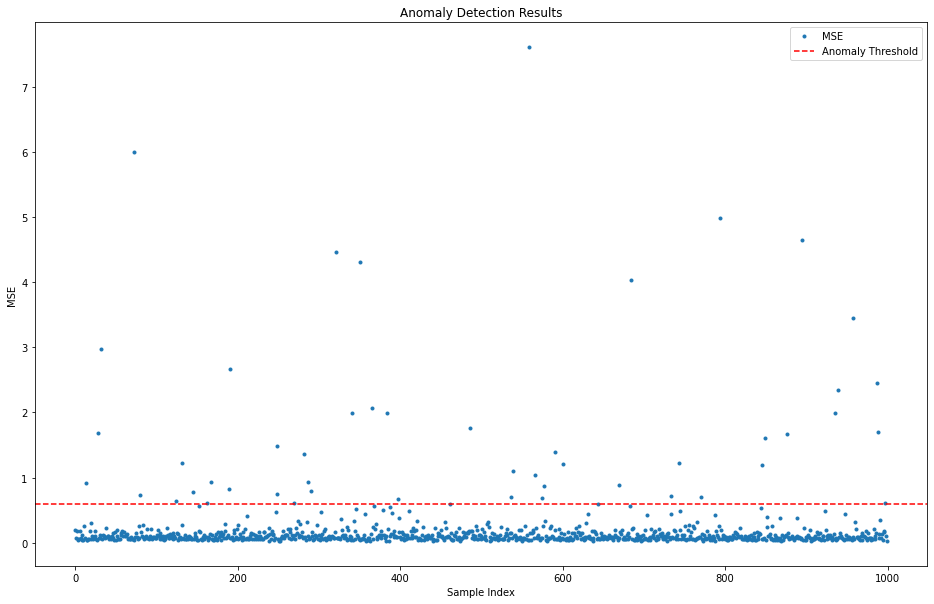

In [18]:
plt.figure(figsize=(16,10))
plt.plot(mse,marker='o',linestyle='',markersize=3,label='MSE')
plt.axhline(threshold,color='r',linestyle='--',label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

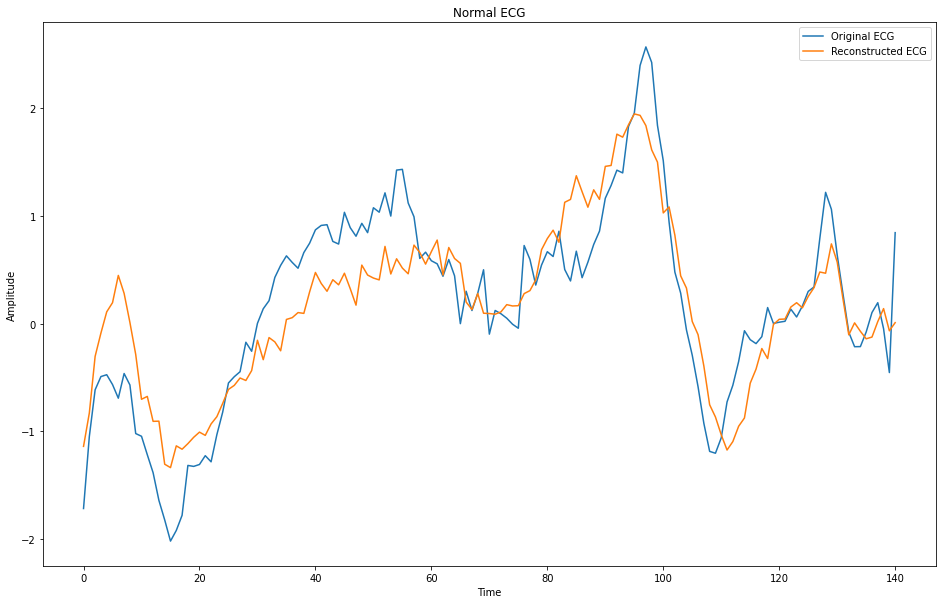

In [19]:
plt.figure(figsize=(16,10))
plt.plot(xtest[0],label='Original ECG')
plt.plot(ypred[0],label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Normal ECG')
plt.legend()
plt.show()

In [21]:
anomalies_index = []
for index,anomaly in enumerate(anomalies):
    if anomaly == True:
        anomalies_index.append(index)

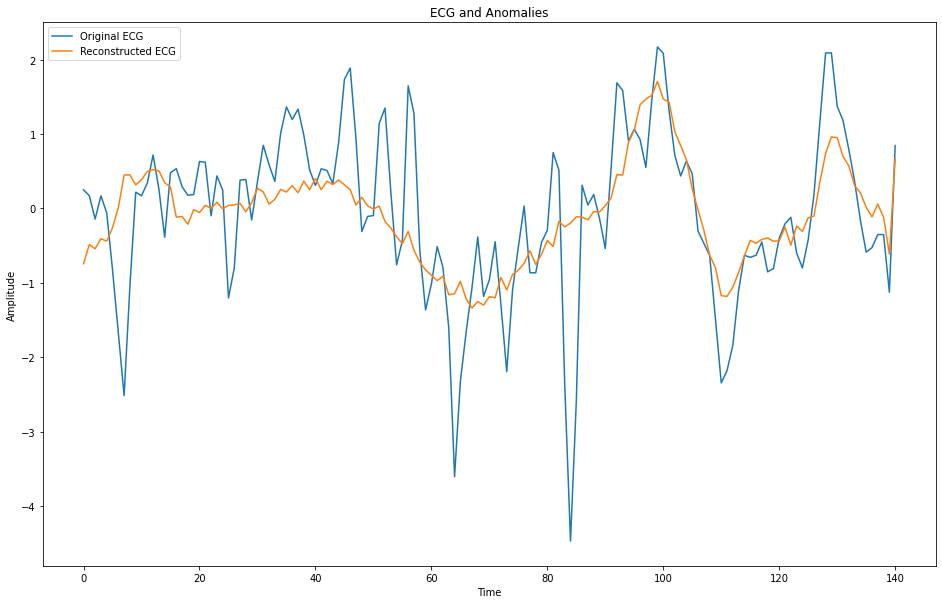

In [23]:
n = 4
anomaly_index = anomalies_index[n]
plt.figure(figsize=(16,10))
plt.plot(xtest[anomaly_index],label='Original ECG')
plt.plot(ypred[anomaly_index],label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG and Anomalies')
plt.legend()
plt.show()

In [24]:
ytrue = np.zeros(len(xtest))
print("Confusion Matrix:")
print(confusion_matrix(anomalies,anomalies))
print("---------------------------------------------------------------")
print("Classification Report:")
print(classification_report(anomalies,anomalies))

Confusion Matrix:
[[950   0]
 [  0  50]]
---------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       950
        True       1.00      1.00      1.00        50

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



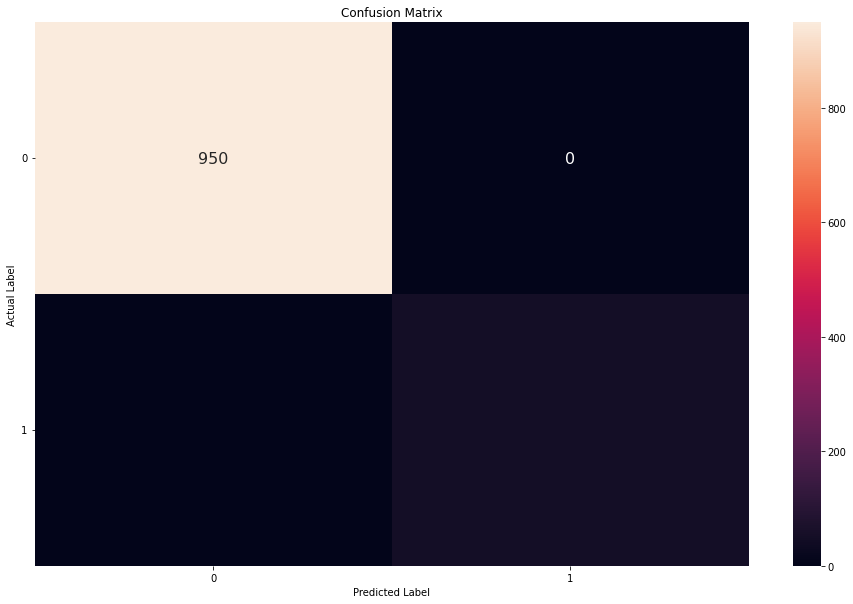

In [25]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(confusion_matrix(anomalies,anomalies),annot=True,annot_kws={'size':16},fmt='d')
plt.xticks([0.5,1.5],rotation='horizontal')
plt.yticks([0.5,1.5],rotation='horizontal')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()